In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from comut import comut

def load_json(file):
    with open(file) as fp:
        data = json.load(fp)
    return data

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams["font.family"] = "arial"

data = load_json(file="summary.json")

In [2]:
def normalize_rgb(dictionary):
    for color in dictionary.keys():
        r, g, b = dictionary[color]
        dictionary[color] = (r / 255., g / 255., b / 255.)
    return dictionary

tableau10 = {
    'blue': (78, 121, 167), 'orange': (242, 142, 43), 'red': (225, 87, 89),
    'cyan': (118, 183, 178), 'green': (89, 161, 79), 'yellow': (237, 201, 72),
    'purple': (176, 122, 161), 'pink': (225, 157, 167), 'brown': (156, 117, 95),
    'grey': (186, 176, 172), 'white': (240, 240, 240)
}

tableau10 = normalize_rgb(tableau10)

In [3]:
# We create a comutation plot with:
# - categorical variants on rows
# - categories on columns
# - A bar chart on the right with the count of approvals

data_categories = []
data_counts = []
for record in data:
    categorical_variant = list(record.keys())[0]
    dictionary = record[categorical_variant]
    
    categories = pd.Series(dictionary['categories'])
    categories = (
        categories#.loc[categories]
        .to_frame()
        .reset_index()
        .rename(columns={'index': 'sample', 0: 'value'})
    )
    categories['category'] = categorical_variant
    categories = categories.loc[:, ['sample', 'category', 'value']]

    counts = pd.DataFrame(
        {'category': categorical_variant, 'FDA approvals': dictionary['relevant_approvals_count']},
        index=[0]
    )

    data_categories.append(categories)
    data_counts.append(counts)

data_categories = pd.concat(data_categories, ignore_index=True)
data_counts = pd.concat(data_counts, ignore_index=True)

data_categories['sample'] = data_categories['sample'].str.replace('_', ' ')

data_counts['FDA approvals'] = data_counts['FDA approvals'].astype(int)
data_counts = data_counts.reset_index(drop=True)

In [4]:
data_categories.head()

,sample,category,value
0,allele origin,(suspected) deleterious BRCA1 variants,False
1,amino acid,(suspected) deleterious BRCA1 variants,False
2,clinical annotation,(suspected) deleterious BRCA1 variants,False
3,exon,(suspected) deleterious BRCA1 variants,False
4,fusion partner,(suspected) deleterious BRCA1 variants,False


In [5]:
data_counts.head()

,category,FDA approvals
0,(suspected) deleterious BRCA1 variants,1
1,(suspected) deleterious BRCA2 variants,1
2,(suspected) deleterious gBRCA1 variants,9
3,(suspected) deleterious gBRCA2 variants,9
4,AKT1 variants,1


In [6]:
data_categories_counts = data_categories.loc[data_categories['value'].eq(True), 'sample'].value_counts()
data_categories_counts

sample
gene                   43
variant type           18
fusion partner          9
pathogenicity           6
exon                    4
clinical annotation     3
allele origin           2
amino acid              1
gene set                1
Name: count, dtype: int64

In [7]:
data_counts = (
    data_counts
    .sort_values(by=['FDA approvals', 'category'], ascending=True)
)

categories_order = (
    data_categories_counts.index.tolist()
)
categorical_variant_order = (
    data_counts
    .loc[:, 'category']
    .tolist()
)

In [8]:
data_counts.head()

,category,FDA approvals
0,(suspected) deleterious BRCA1 variants,1
1,(suspected) deleterious BRCA2 variants,1
4,AKT1 variants,1
5,ALK variants,1
7,BRAF rearrangements,1


In [9]:
data_categories

,sample,category,value
0,allele origin,(suspected) deleterious BRCA1 variants,False
1,amino acid,(suspected) deleterious BRCA1 variants,False
2,clinical annotation,(suspected) deleterious BRCA1 variants,False
3,exon,(suspected) deleterious BRCA1 variants,False
4,fusion partner,(suspected) deleterious BRCA1 variants,False
...,...,...,...
391,fusion partner,v::ROS1,True
392,gene,v::ROS1,True
393,gene set,v::ROS1,False
394,pathogenicity,v::ROS1,False


In [10]:
data_counts

,category,FDA approvals
0,(suspected) deleterious BRCA1 variants,1
1,(suspected) deleterious BRCA2 variants,1
4,AKT1 variants,1
5,ALK variants,1
7,BRAF rearrangements,1
11,EZH2 variants,1
12,FGFR1 rearrangement,1
16,HER2 (ERBB2) variants,1
20,KMT2A translocations,1
21,KRAS variants,1


In [11]:
data_counts['category'].isin(data_categories['category']).value_counts()

category
True    44
Name: count, dtype: int64

In [16]:
def plot_comutation_plot(categories_data, counts_data, categories_order, categorical_variant_order, show_categories=True, show_legend=False):
    custom_rcParams = {
        'font.family': 'Arial',
        'font.size': 12,
        'axes.labelsize': 13,
        'legend.fontsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
    }
    
    plt.rcParams.update(custom_rcParams)
    
    comut_object = comut.CoMut()
    comut_object.samples = categories_order
    comut_object.add_categorical_data(
        categories_data, 
        name = 'Categories',
        category_order = categorical_variant_order,
        mapping = {
            True: tableau10['blue'],
            False: '#F2F2F2'
        }
    )
    comut_object.add_side_bar_data(
        counts_data,
        name = 'Counts',
        paired_name = 'Categories',
        mapping = {
            'FDA approvals': tableau10['orange']
        },
        xlabel = 'FDA approvals',
        position = 'right',
        bar_kwargs = {
            'height': 0.8,
        }
    )
    
    comut_object.plot_comut(
        figsize = (5, 10),
        x_padding = 0.04,
        y_padding = 0.04
    )
    
    for p in comut_object.axes['Counts'].patches:
        value = p.get_width()
        comut_object.axes['Counts'].annotate(
            f'{value:.0f}',
            (value, p.get_y() + p.get_height()*0.4),
            xytext=(3, 0),
            textcoords='offset points',
            va='center',
            ha='left'
        )

    ax = comut_object.axes['Categories']
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_ha('right')
        label.set_rotation_mode('anchor')
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_title(
        'Categorical variants associated with oncology approvals\nfrom the US Food and Drug Administration', 
        fontsize=12
    )
    
    if not show_categories:
        comut_object.axes['Categories'].set_xticklabels([])
    
    if show_legend:
        comut_object.add_unified_legend(
            axis_name='Categories', # Rename after resolving https://github.com/ga4gh/2025-catvar-call-to-action/issues/2
            loc=2
        )

    return comut_object

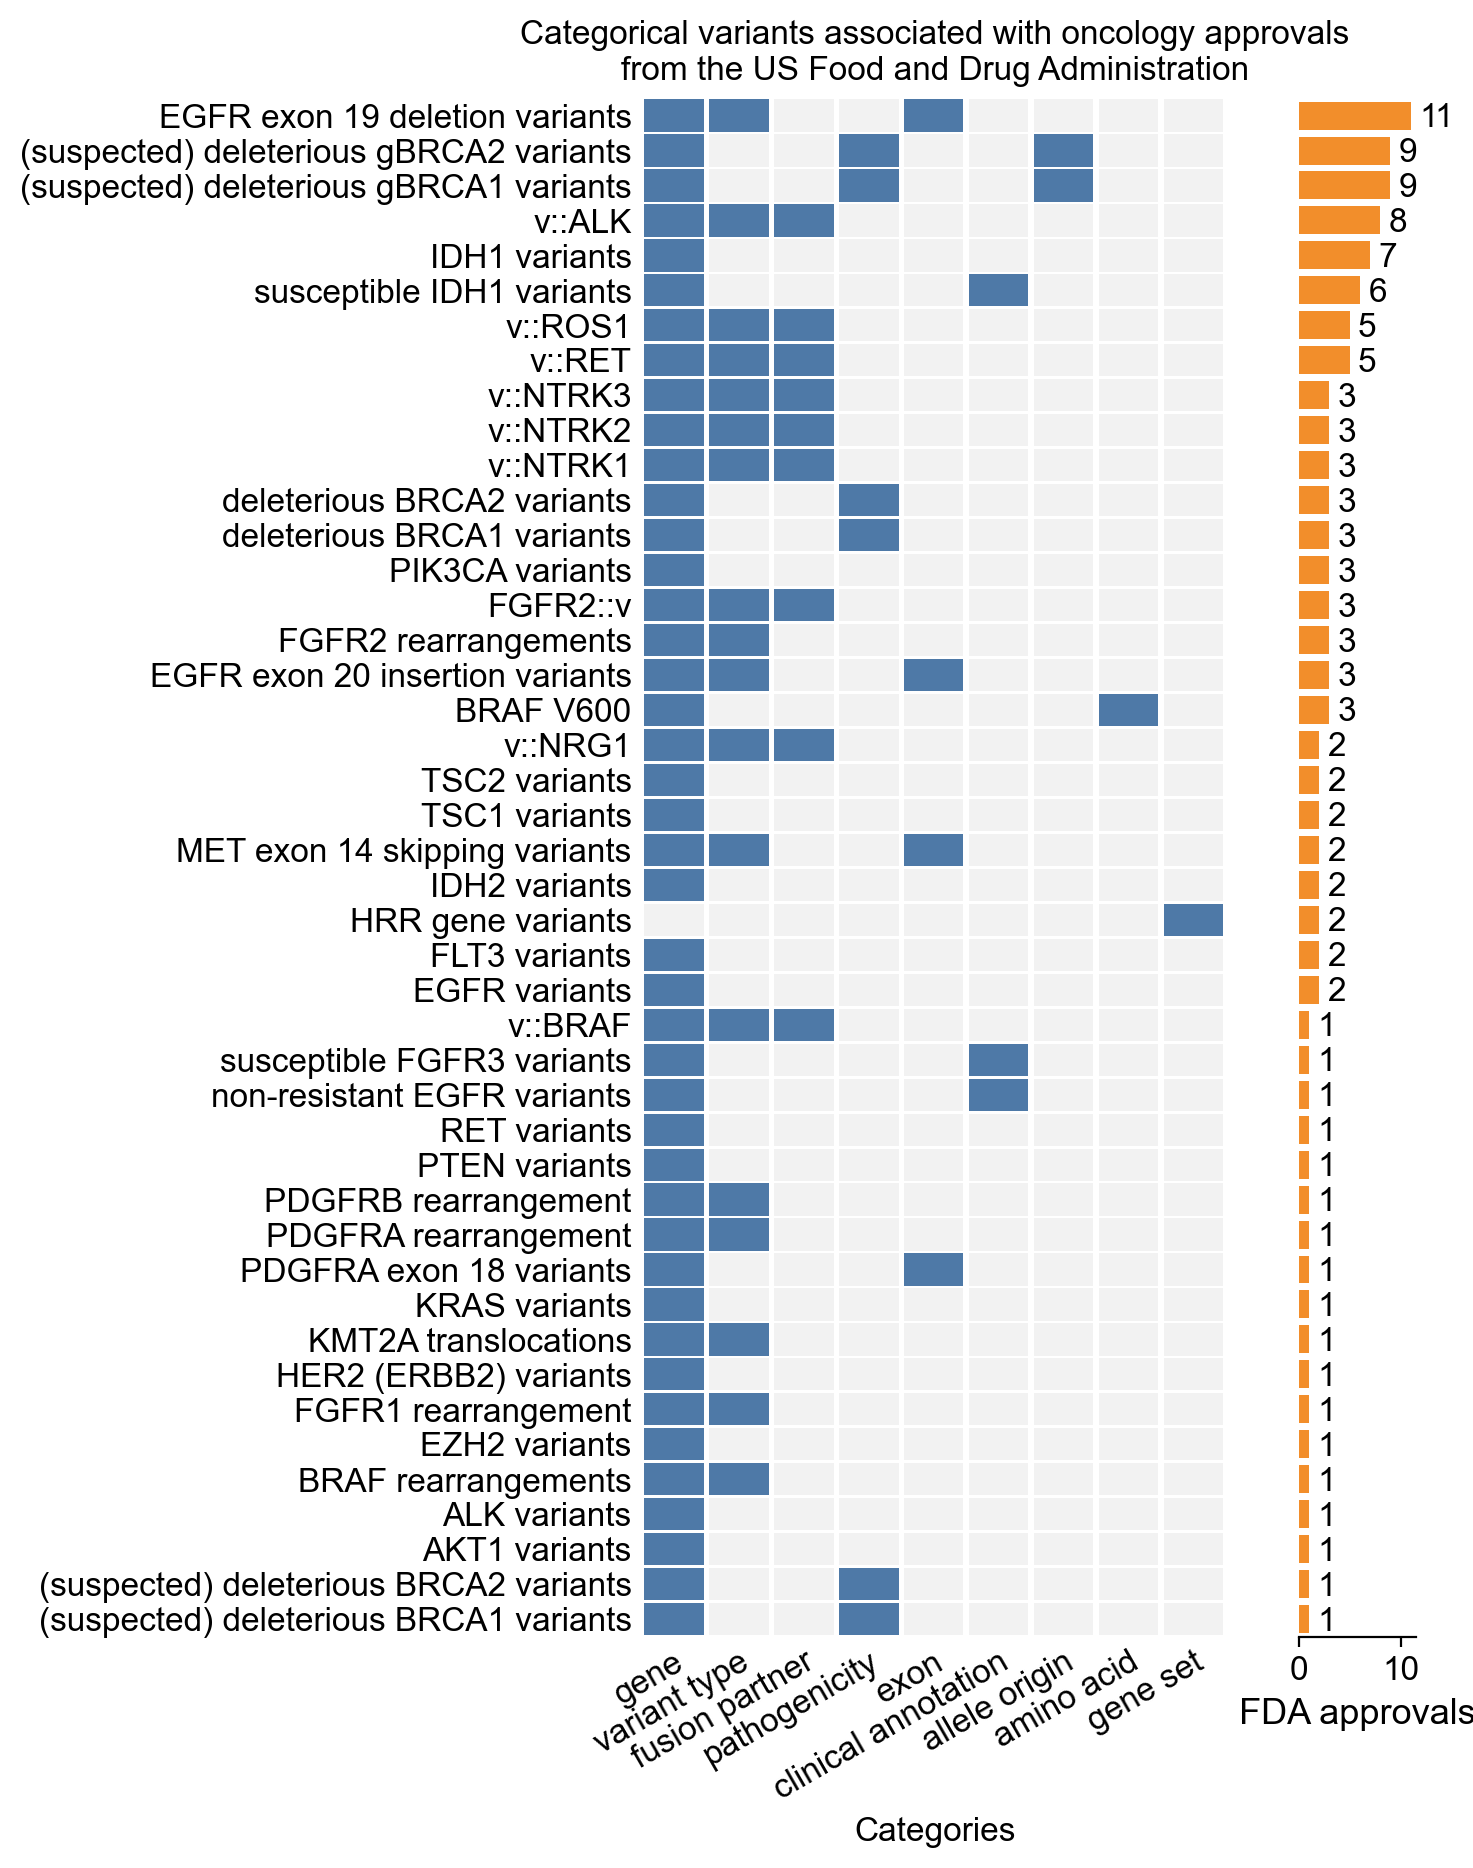

In [17]:
p_with_categories = plot_comutation_plot(
    categories_data = data_categories,
    counts_data = data_counts,
    categories_order = categories_order,
    categorical_variant_order = categorical_variant_order,
    show_categories = True,
    show_legend = False
)
p_with_categories.figure.savefig('fda_categorical_variants.svg', bbox_inches = 'tight', dpi = 300)
p_with_categories.figure.savefig('fda_categorical_variants.png', bbox_inches = 'tight', dpi = 300)

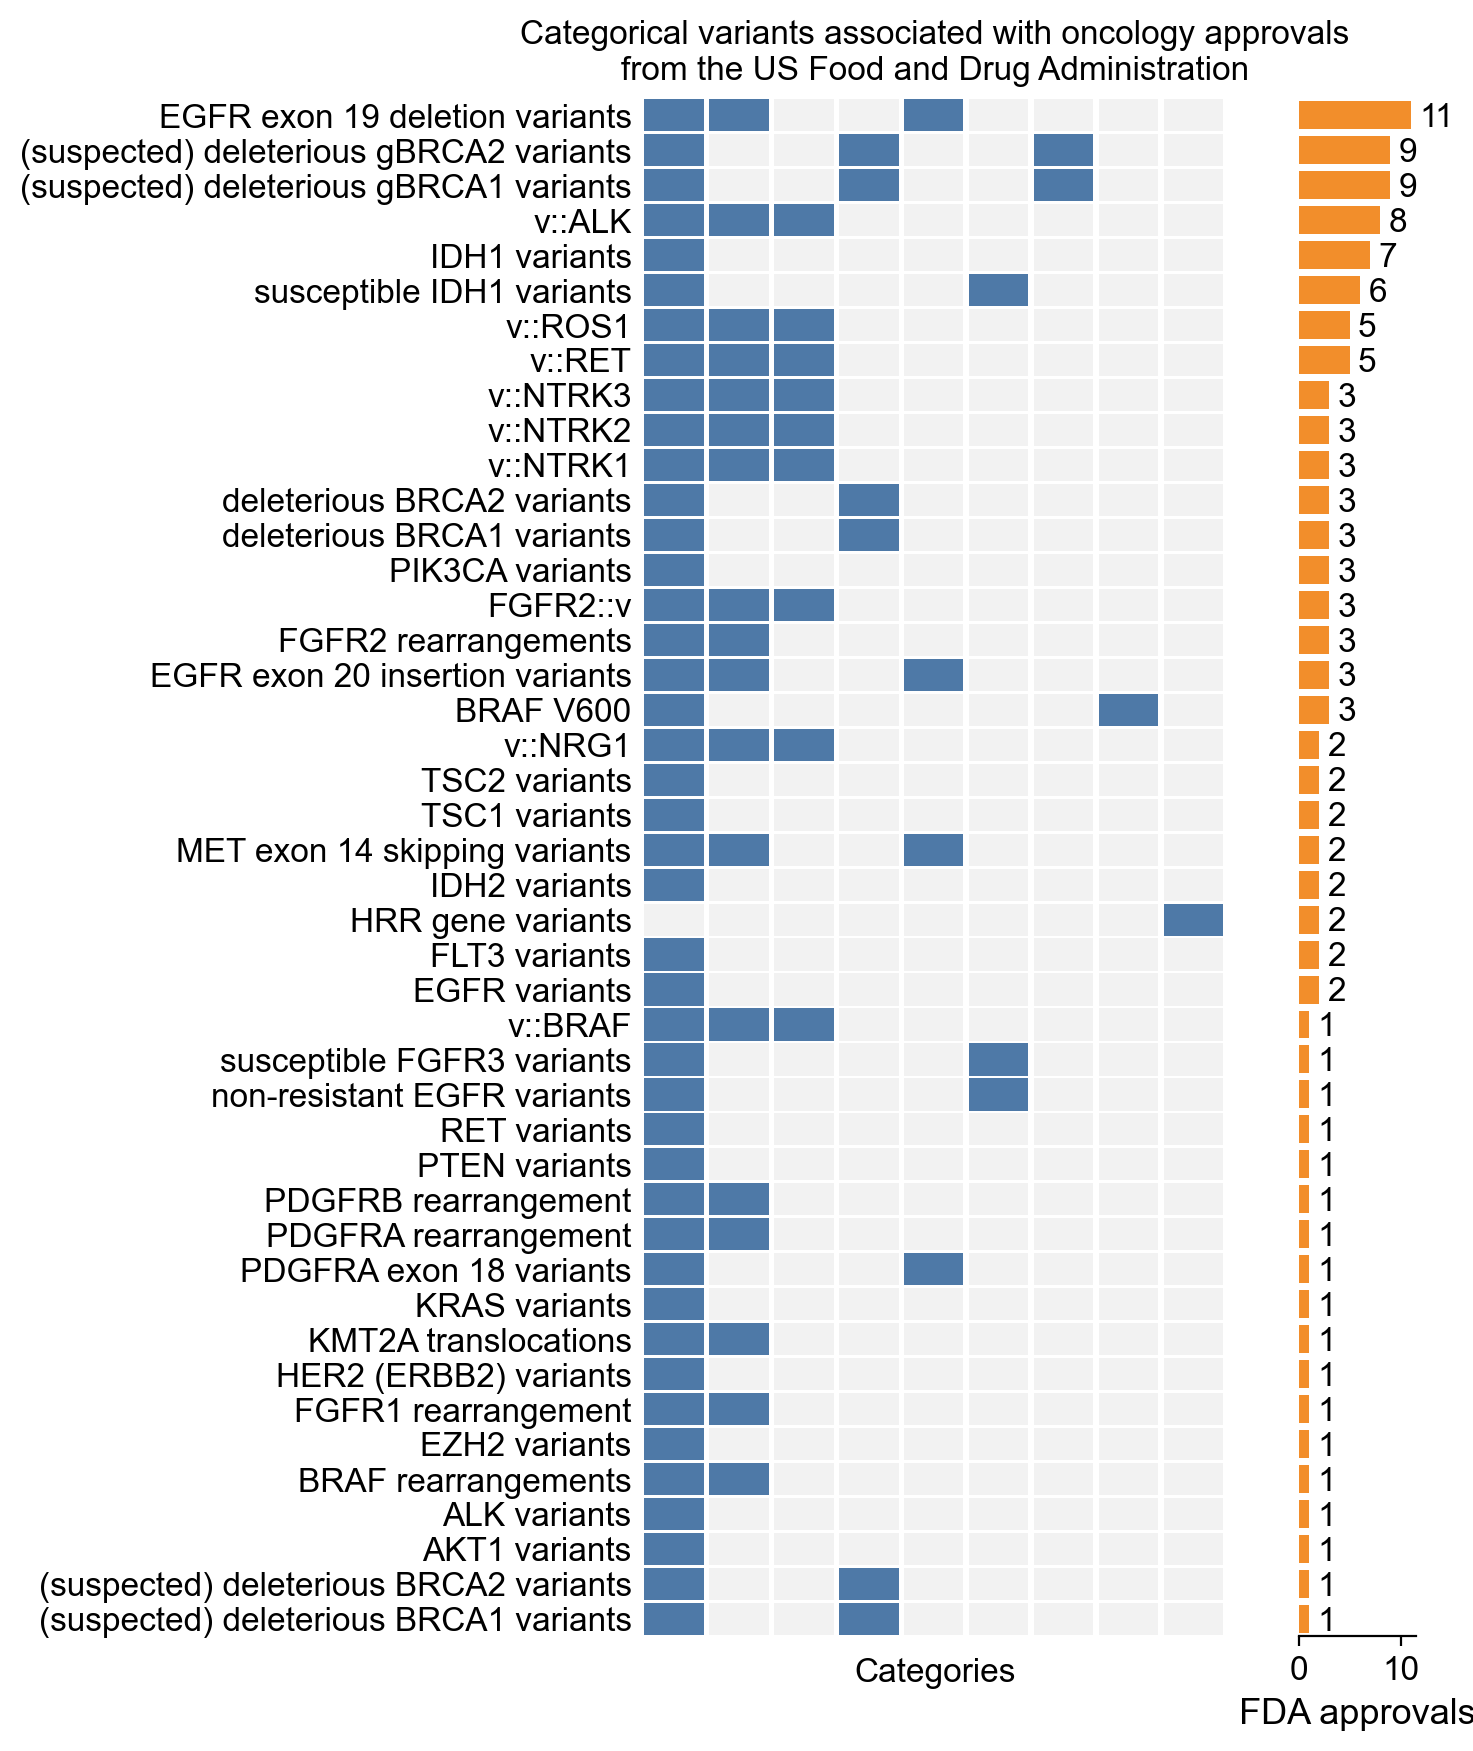

In [18]:
p_without_categories = plot_comutation_plot(
    categories_data = data_categories,
    counts_data = data_counts,
    categories_order = categories_order,
    categorical_variant_order = categorical_variant_order,
    show_categories = False,
    show_legend = False
)
p_without_categories.figure.savefig('fda_categorical_variants.hide_categories.svg', bbox_inches = 'tight', dpi = 300)
p_without_categories.figure.savefig('fda_categorical_variants.hide_categories.png', bbox_inches = 'tight', dpi = 300)